/home/lloveras/.conda/envs/gcs_ml_diego/lib/python3.10/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generation = 1
Fitness    = 0.4708407040193596
Change     = 0.4708407040193596
Generation = 2
Fitness    = 2.2409656770277584
Change     = 1.7701249730083988
Generation = 3
Fitness    = 2.2409656770277584
Change     = 0.0
Generation = 4
Fitness    = 2.2409656770277584
Change     = 0.0
Generation = 5
Fitness    = 2.2409656770277584
Change     = 0.0
Generation = 6
Fitness    = 9.96734433013176
Change     = 7.726378653104002
Generation = 7
Fitness    = 9.96734433013176
Change     = 0.0
Generation = 8
Fitness    = 14.864651724261604
Change     = 4.897307394129843
Generation = 9
Fitness    = 14.864651724261604
Change     = 0.0
Generation = 10
Fitness    = 14.864651724261604
Change     = 0.0
Generation = 11
Fitness    = 14.864651724261604
Change     = 0.0
Generation = 12
Fitness    = 14.864651724261604
Change     = 0.0
Generation = 13
Fitness    = 14.864651724261604
Change     = 0.0
Generation = 14
Fitness    = 14.864651724261604
Change     = 0.0
Generation = 15
Fitness    = 14.8646517242616

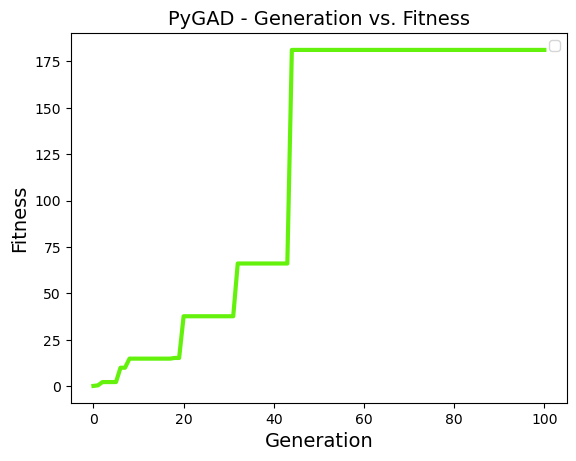

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Parameters of the best solution : [ 1.8367933   1.70223238  2.23995554  1.5607284  -3.36494763  2.67980885]
Fitness value of the best solution = 181.2185534148765
Index of the best solution : 0
Predicted output based on the best solution : 44.00551719877797
Best fitness value reached after 44 generations.


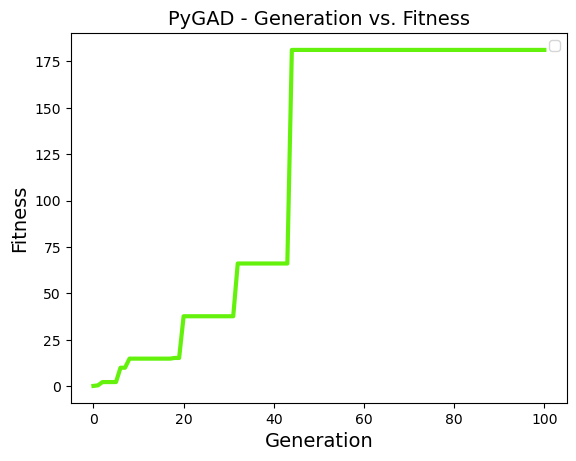

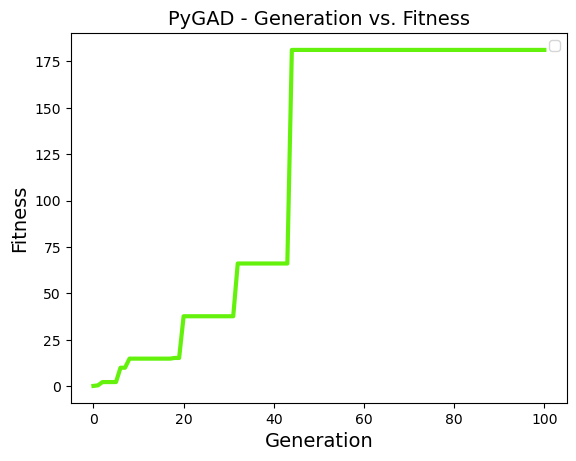

In [18]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

In [19]:
def fitness_function(solution, solution_idx):
    return sum(solution)

ga_instance = pygad.GA(num_generations=1,
                       num_parents_mating=2,
                       sol_per_pop=3,
                       num_genes=4,
                       fitness_func=fitness_function,

                       init_range_low=5,
                       init_range_high=15)

In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness function named 'fitness_function' accepts 2 parameter(s).
Traceback (most recent call last):
  File "/home/lloveras/.conda/envs/gcs_ml_diego/lib/python3.10/site-packages/pygad/pygad.py", line 951, in __init__
    raise ValueError(f"In PyGAD 2.20.0, the fitness function must accept 3 parameters:\n1) The instance of the 'pygad.GA' class.\n2) A solution to calculate its fitness value.\n3) The solution's index within the population.\n\nThe passed fitness function named '{fitness_func.__code__.co_name}' accepts {fitness_func.__code__.co_argcount} parameter(s).")
ValueError: In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The pas

ValueError: In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness function named 'fitness_function' accepts 2 parameter(s).

In [20]:
import numpy as np

# Define the multivariable function (example: Rosenbrock function)
def func(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# Metropolis sampling function
def metropolis_sampling(func, initial_position, n_iterations, step_size, temperature):
    current_position = np.array(initial_position)
    current_value = func(current_position)
    min_position = current_position
    min_value = current_value
    
    for i in range(n_iterations):
        # Propose a new position by taking a step in the parameter space
        new_position = current_position + np.random.uniform(-step_size, step_size, size=current_position.shape)
        new_value = func(new_position)
        
        # Acceptance criterion
        delta = new_value - current_value
        if delta < 0 or np.random.rand() < np.exp(-delta / temperature):
            current_position = new_position
            current_value = new_value
            
            # Update the minimum if the new value is lower
            if new_value < min_value:
                min_value = new_value
                min_position = new_position
    
    return min_position, min_value

# Parameters
initial_position = [2.0, 2.0]  # Starting point in the space
n_iterations = 10000           # Number of iterations to run the algorithm
step_size = 0.1                # Size of each step in the random walk
temperature = 1.0              # Temperature parameter for the Metropolis criterion

# Run Metropolis sampling
min_position, min_value = metropolis_sampling(func, initial_position, n_iterations, step_size, temperature)

min_position, min_value

(array([1.00404813, 1.0078129 ]), 2.537209544752158e-05)